In [2]:
from pandas import read_csv
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot as plt
import math

df8 = read_csv("C:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",sep=",",header=0)

df8.ts = pd.to_datetime(df8.ts)

df8.rename(columns = {"Time":"ts"}, inplace = True)
df8.ts = df8.ts.apply(lambda x: x.replace(tzinfo=None))
#df8.ts = df8.ts.apply(lambda x: x.date())

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)

df8 = df8.rename(columns=change)
df8 = df8.set_index("ts")
df8

,R1,R2,R3,R4,R5,R6,R7,R8,T1,T2,...,V3,V4,V5,V6,V7,V8,T,RH,P,IAQ
ts,,,,,,,,,,,,,,,,,,,,,
2019-08-26 16:15:00,81512.0,1952.0,119156360.0,85111688.0,499000000.0,499000000.0,499000000.0,499000000.0,90.7,92.8,...,0.35,0.35,0.35,0.35,0.35,0.35,25.0,62.9,979.4,87.91
2019-08-26 16:16:00,80610.0,1950.0,117028568.0,86231576.0,499000000.0,499000000.0,499000000.0,499000000.0,81.0,82.1,...,0.35,0.35,0.35,0.35,0.35,0.35,25.3,62.5,979.3,108.96
2019-08-26 16:17:00,80412.0,1957.0,117028568.0,85111688.0,499000000.0,499000000.0,499000000.0,499000000.0,81.9,83.5,...,0.36,0.36,0.36,0.35,0.36,0.35,25.5,62.0,979.3,125.47
2019-08-26 16:18:00,80117.0,1961.0,118082880.0,87381328.0,499000000.0,499000000.0,499000000.0,499000000.0,82.4,83.4,...,0.36,0.36,0.35,0.35,0.36,0.35,25.8,61.6,979.3,139.41
2019-08-26 16:19:00,79873.0,1965.0,118082880.0,87381328.0,499000000.0,499000000.0,499000000.0,499000000.0,80.1,80.6,...,0.35,0.35,0.35,0.35,0.35,0.35,26.0,61.2,979.3,150.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 09:07:00,32000000.0,128000000.0,173762.0,253485.0,210823536.0,499000000.0,40292300.0,184742272.0,105.7,100.8,...,1.99,2.07,1.95,4.06,4.52,2.25,31.9,31.2,990.9,113.40
2023-06-26 09:08:00,32000000.0,128000000.0,173517.0,252446.0,203636368.0,499000000.0,40497176.0,183324816.0,105.8,100.9,...,1.99,2.07,1.95,4.07,4.52,2.25,31.9,32.0,990.8,112.90
2023-06-26 09:09:00,32000000.0,128000000.0,173367.0,252406.0,202485872.0,499000000.0,41918128.0,178753120.0,105.8,100.8,...,1.99,2.07,1.96,4.07,4.52,2.24,31.9,31.8,990.8,111.30


In [5]:
df8=df8.dropna()
df_par=df8["2021-01-13":"2021-06-30"][['R1','R2']]
def changename(sensor1, sensor2, df_parnumber):
    df_parnumber
    change = {}
    change[sensor1] = "R1"
    change[sensor2] = "R2"
    df_parnumber = df_parnumber.rename(columns=change)
    return df_parnumber

df_par = changename("R1", "R2", df_par)
df_par

,R1,R2
ts,,
2021-01-13 08:46:00,128000000.0,128000000.0
2021-01-13 08:47:00,128000000.0,128000000.0
2021-01-13 08:48:00,128000000.0,128000000.0
2021-01-13 08:49:00,128000000.0,128000000.0
2021-01-13 08:50:00,128000000.0,128000000.0
...,...,...
2021-06-30 23:55:00,21333334.0,21333334.0
2021-06-30 23:56:00,21333334.0,21333334.0
2021-06-30 23:57:00,21333334.0,21333334.0


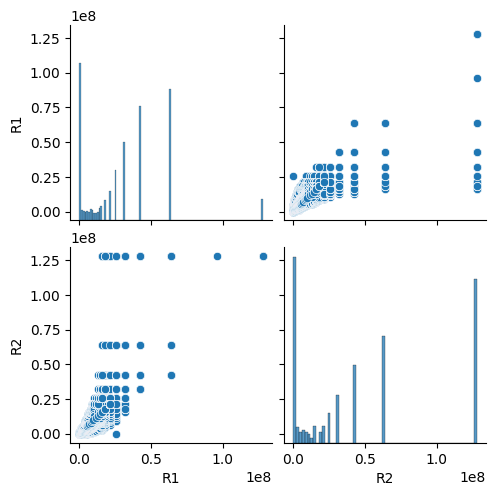

In [8]:
import seaborn as sns
sns.pairplot(df_par)


In [6]:
df8=df8.dropna()
df_par2=df8["2021-06-30":"2022-09-28"][['R5','R6']]
df_par2=changename("R5", "R6", df_par2)
df_par2

,R1,R2
ts,,
2021-06-30 00:00:00,764440.0,707406.0
2021-06-30 00:01:00,764831.0,708524.0
2021-06-30 00:02:00,766729.0,709029.0
2021-06-30 00:03:00,765812.0,710040.0
2021-06-30 00:04:00,768505.0,709591.0
...,...,...
2022-09-28 23:55:00,8739332.0,10043436.0
2022-09-28 23:56:00,8669569.0,9997211.0
2022-09-28 23:57:00,8671667.0,9944506.0


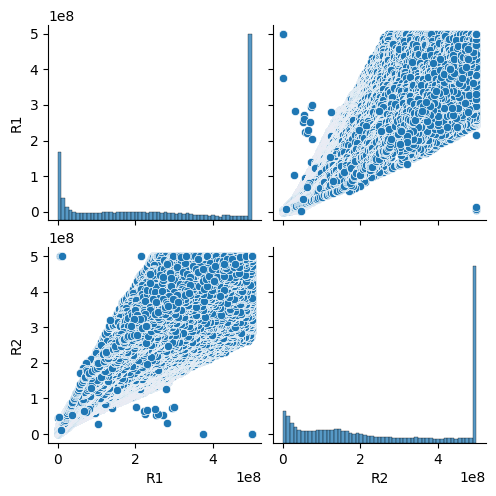

In [7]:
sns.pairplot(df_par2)

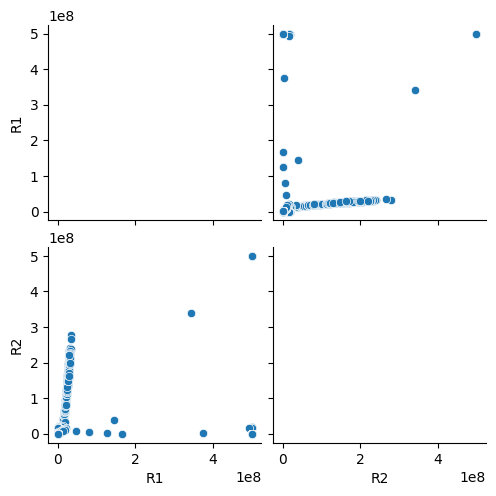

In [9]:
df8=df8.dropna()
df_par3=df8["2022-09-28":][['R3', 'R4']]

df_par3 = changename("R3", "R4", df_par3)
df_par3
sns.pairplot(df_par3)

                      Time  PM10  Biossido di Azoto  Biossido Zolfo  Ozono   
0      2020-01-01 01:00:00  71.0               48.0             5.0    4.0  \
1      2020-01-01 02:00:00  52.0               49.0             4.0    4.0   
2      2020-01-01 03:00:00  51.0               52.0             5.0    4.0   
3      2020-01-01 04:00:00  41.0               48.0             4.0    3.0   
4      2020-01-01 05:00:00  35.0               48.0             3.0    3.0   
...                    ...   ...                ...             ...    ...   
33134  2022-03-04 14:00:00   NaN                NaN             NaN   75.0   
33135  2022-06-21 14:00:00   NaN                NaN             NaN  143.0   
33136  2022-09-02 11:00:00   NaN                NaN             NaN   61.0   
33137  2023-02-01 13:00:00   NaN                NaN             NaN   32.0   
33138  2023-04-26 14:00:00   NaN                NaN             NaN  104.0   

      PM2.5  
0      59.0  
1      42.0  
2      43.0  
3      

C:\Users\ricca\AppData\Local\Temp\ipykernel_16116\2797850989.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  APPA1.Time = APPA1.ts.apply(lambda x: x.replace(tzinfo=None))


                       ts            R1            R2  PM10   
0     2021-01-13 08:00:00  7.513813e+07  7.495123e+07  34.0  \
1     2021-01-13 09:00:00  1.229693e+05  1.594143e+05  34.0   
2     2021-01-13 10:00:00  1.667689e+05  1.726829e+05  34.0   
3     2021-01-13 11:00:00  1.783548e+05  1.697015e+05  40.0   
4     2021-01-13 12:00:00  6.142983e+05  1.656913e+05  38.0   
...                   ...           ...           ...   ...   
24026 2023-06-26 05:00:00  1.616251e+05  2.280766e+05  23.0   
24027 2023-06-26 06:00:00  1.625640e+05  2.293559e+05  23.0   
24028 2023-06-26 07:00:00  1.660679e+05  2.362660e+05  24.0   
24029 2023-06-26 08:00:00  1.719140e+05  2.490089e+05  20.0   
24030 2023-06-26 09:00:00  1.732762e+05  2.525260e+05  20.0   

       Biossido di Azoto  Biossido Zolfo  Ozono PM2.5  
0                   78.0             6.0    4.0  24.0  
1                   85.0             8.0    5.0  24.0  
2                   81.0             7.0    7.0  25.0  
3                  

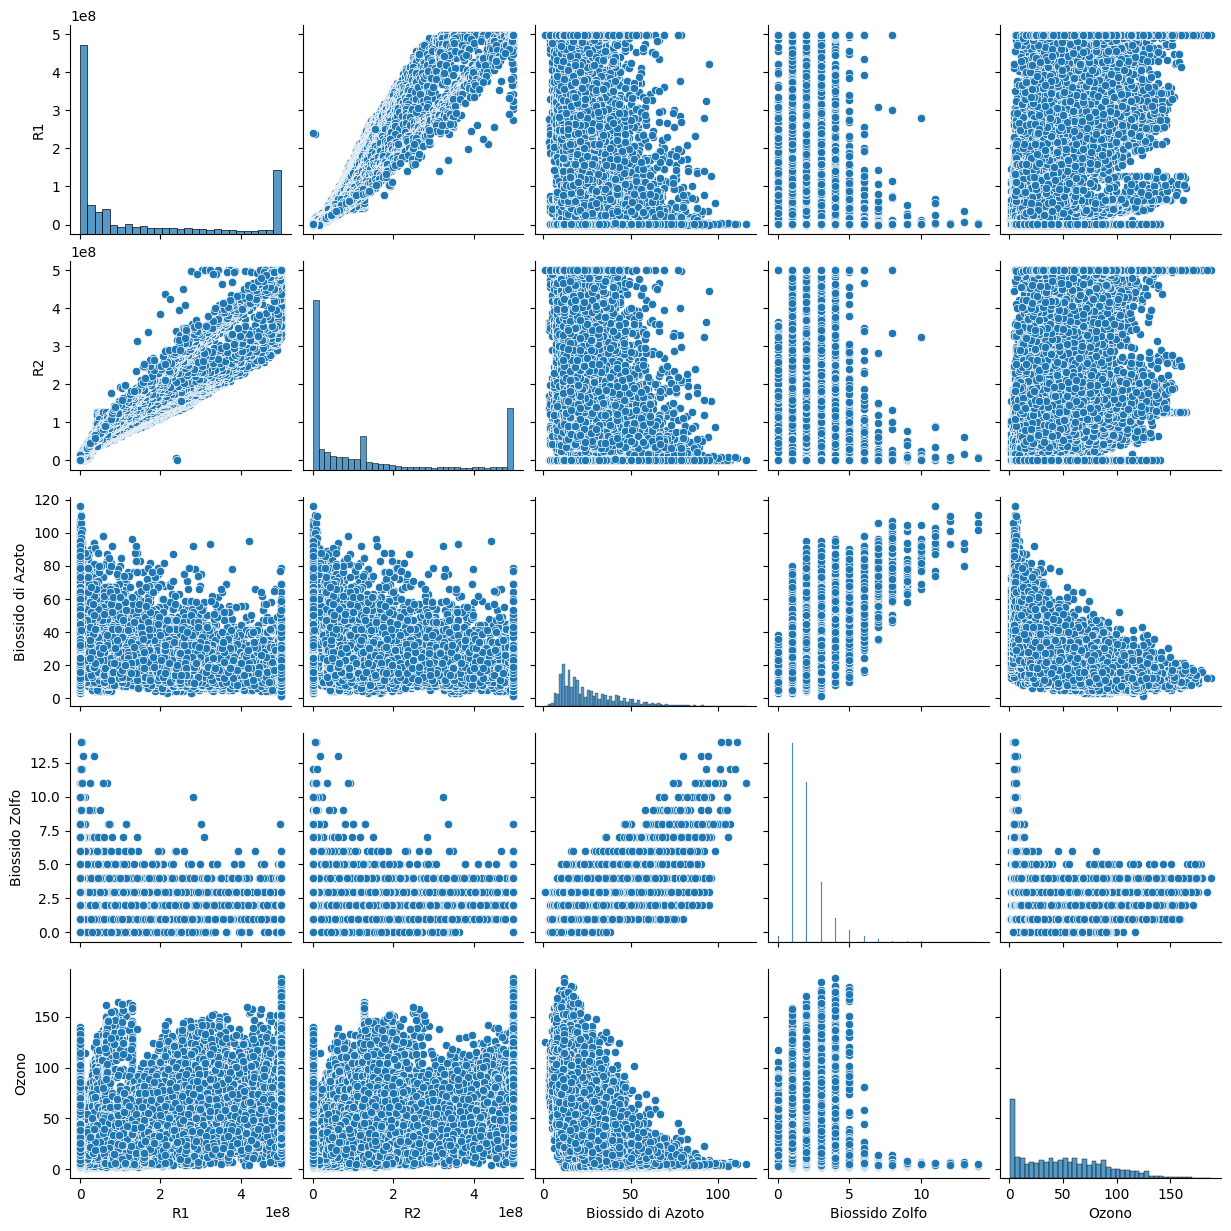

In [10]:
#df_tot = df_par.resample("1H").mean().merge(df_par2)
APPA1 = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv",sep=",",header=0)
print(APPA1)

APPA1.Time = pd.to_datetime(APPA1.Time)
APPA1.rename(columns = {"Time":"ts"}, inplace = True)
APPA1.Time = APPA1.ts.apply(lambda x: x.replace(tzinfo=None))

change = {}
change["Time"] = "ts"
change["PM10"] = "PM10"
change["Biossido di Azoto"] = "Biossido di Azoto"
change["Biossido di Zolfo"] = "Biossido di Zolfo"
change["Ozono"] = "Ozono"

APPA1 = APPA1.rename(columns=change)

#print(APPA1)



par_tot= pd.concat([df_par.resample("1H").mean(),(df_par2),(df_par3)])

#print(par_tot)
par_tot=par_tot.resample("1H").mean().reset_index().merge(APPA1)

print(sns.pairplot(par_tot))
print(par_tot)

#sns.pairplot(par_tot)

In [43]:
print(par_tot)

                       ts            R1            R2  PM10   
0     2021-01-13 08:00:00  7.513813e+07  7.495123e+07  34.0  \
1     2021-01-13 09:00:00  1.229693e+05  1.594143e+05  34.0   
2     2021-01-13 10:00:00  1.667689e+05  1.726829e+05  34.0   
3     2021-01-13 11:00:00  1.783548e+05  1.697015e+05  40.0   
4     2021-01-13 12:00:00  6.142983e+05  1.656913e+05  38.0   
...                   ...           ...           ...   ...   
24026 2023-06-26 05:00:00  1.616251e+05  2.280766e+05  23.0   
24027 2023-06-26 06:00:00  1.625640e+05  2.293559e+05  23.0   
24028 2023-06-26 07:00:00  1.660679e+05  2.362660e+05  24.0   
24029 2023-06-26 08:00:00  1.719140e+05  2.490089e+05  20.0   
24030 2023-06-26 09:00:00  1.732762e+05  2.525260e+05  20.0   

       Biossido di Azoto  Biossido Zolfo  Ozono PM2.5  
0                   78.0             6.0    4.0  24.0  
1                   85.0             8.0    5.0  24.0  
2                   81.0             7.0    7.0  25.0  
3                  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


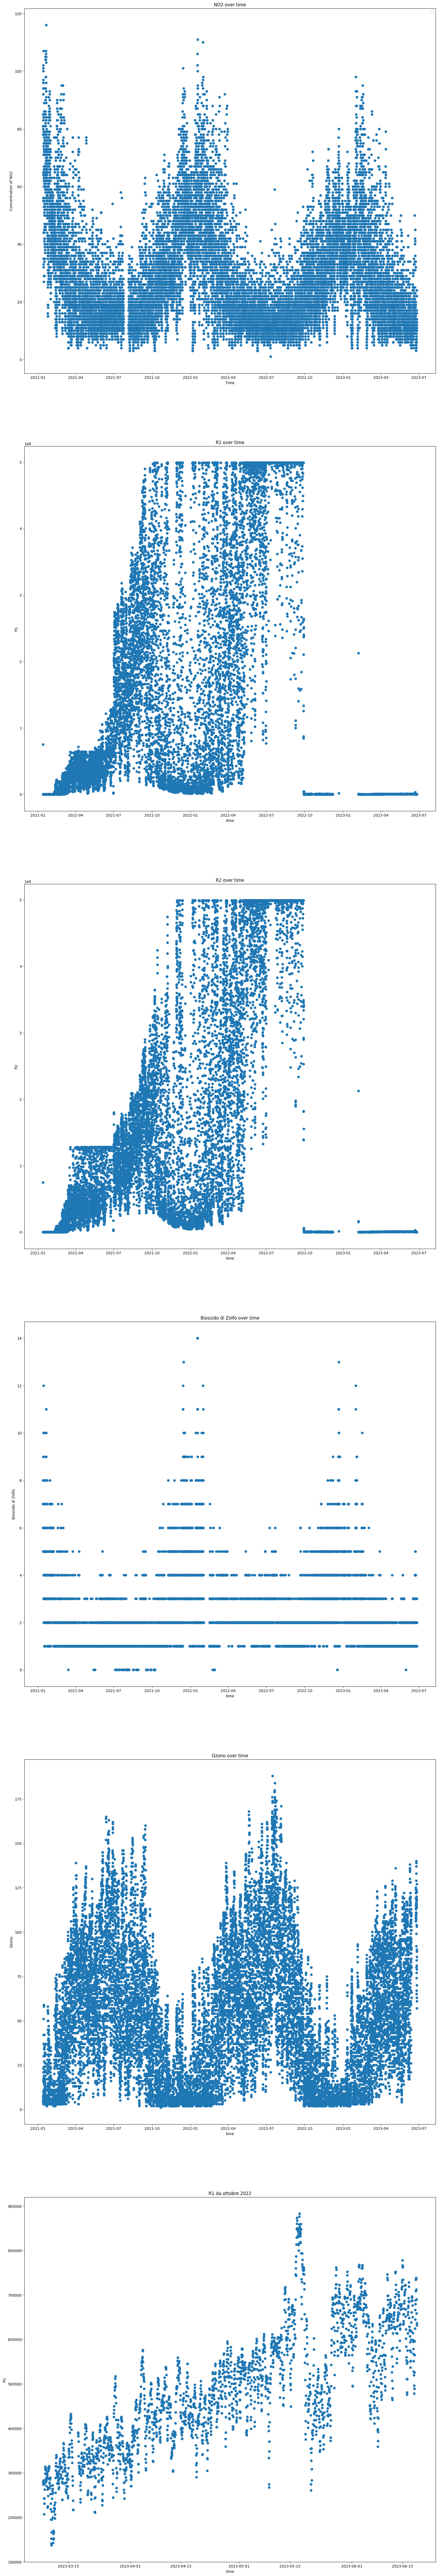

In [47]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, ncols=1, figsize=(20, 125))


ax1.scatter(par_tot["ts"], par_tot["Biossido di Azoto"])
ax2.scatter(par_tot["ts"], par_tot["R1"])
ax3.scatter(par_tot["ts"], par_tot["R2"])
ax4.scatter(par_tot["ts"], par_tot["Biossido Zolfo"])
ax5.scatter(par_tot["ts"], par_tot["Ozono"])
ax6.scatter(par_tot.set_index("ts")["2023-03-08":"2023-06-18"].index, par_tot.set_index("ts")["2023-03-08":"2023-06-18"].R1)

ax6.set_title('R1 da ottobre 2022')
ax6.set_xlabel('time')
ax6.set_ylabel('R1')

ax4.set_title('Biossido di Zolfo over time')
ax4.set_xlabel('time')
ax4.set_ylabel('Biossido di Zolfo')

ax5.set_title('Ozono over time')
ax5.set_xlabel('time')
ax5.set_ylabel('Ozono')

ax3.set_title('R2 over time')
ax3.set_xlabel('time')
ax3.set_ylabel('R2')

ax3.set_title('R2 over time')
ax3.set_xlabel('time')
ax3.set_ylabel('R2')

ax2.set_title('R1 over time')
ax2.set_xlabel('time')
ax2.set_ylabel('R1')

ax1.set_title('NO2 over time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration of NO2')

ax1.legend()

plt.show()

In [56]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 30))
fig.suptitle('Gas')
outer = gridspec.GridSpec(4,2, wspace=0.2, hspace=0.2)
cl=df8.columns
annostr = ["R","T"]
gas=["PM10","Biossido di Azoto","Ozono","Biossido Zolfo"]
color=["blue","green"]
count = 0
j=1
for i in range(1):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
    subplot_spec=outer[i-1], wspace=0.1, hspace=0.2) 
    ax = plt.Subplot(fig, inner[j])
    ax.plot(df_par.loc[df_par["T"+str(i)] < 160][:].index, df_par.loc[df_par["T"+str(i)] < 160][:][annostr[j]+str(i)],'tab:'+color[j], label=annostr[j]+" "+str(i))
    ax.legend()
    fig.add_subplot(ax)

fig.show()

KeyError: 'T0'

<Figure size 2500x3000 with 0 Axes>